## **Installing Libraries**

In [ ]:
!pip install keras tensorflow scikit-learn

In [ ]:
!pip install sweetviz

##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


##**Load Dataset Employee**

In [ ]:
data = pd.read_csv("Employee.csv")

##**Dataset information**

In [ ]:
print(data.columns)

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')


In [ ]:
data.shape

(4653, 9)

In [ ]:
print(data.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


In [ ]:
data.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


##**Exploratory Data Analysis (EDA)**

In [ ]:
# Identifying the number of entries, attributes, and data types
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB
None


In [ ]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [ ]:
# Descriptive statistics for numerical attributes
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4653.000000  
mean      0.343864  
std       0.475047  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


                                             |          | [  0%]   00:00 -> (? left)


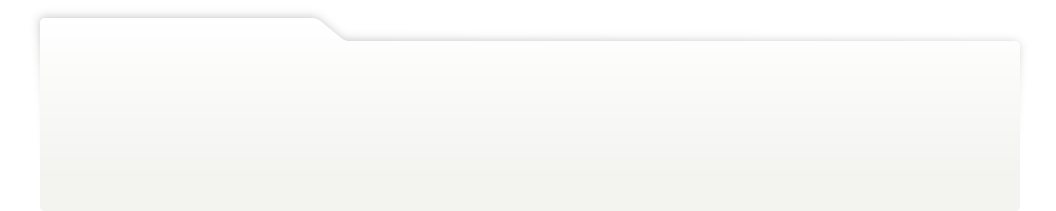
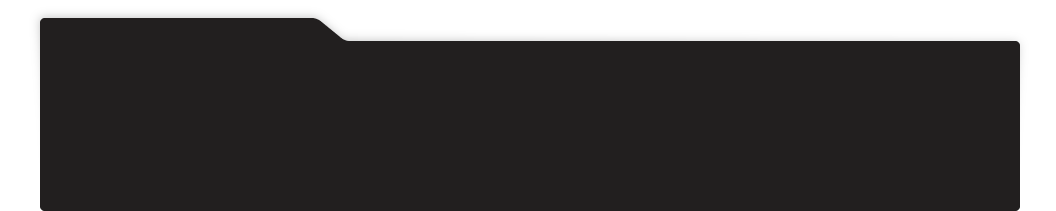
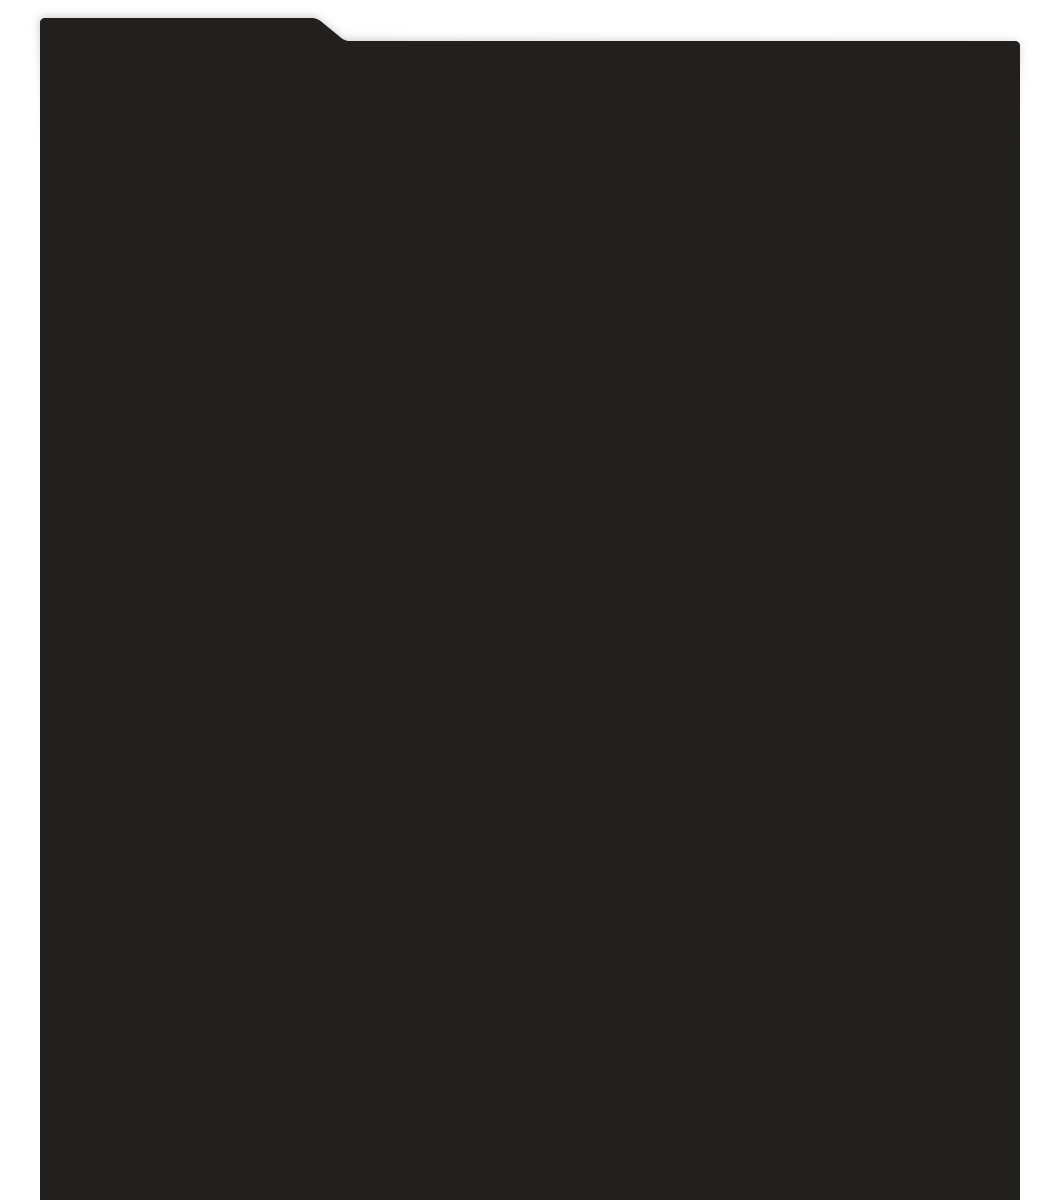
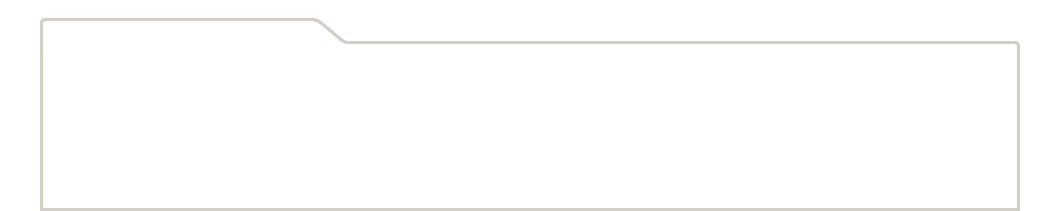
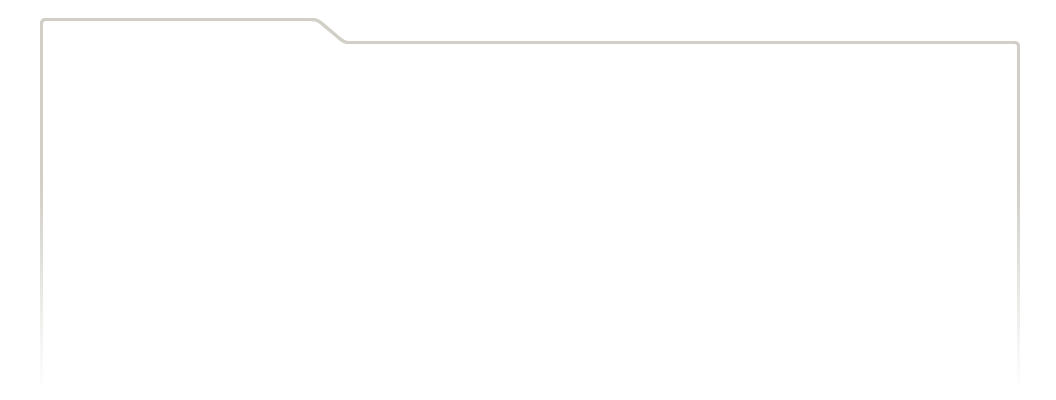
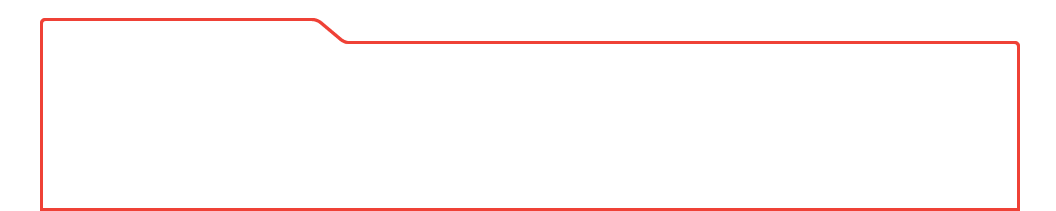
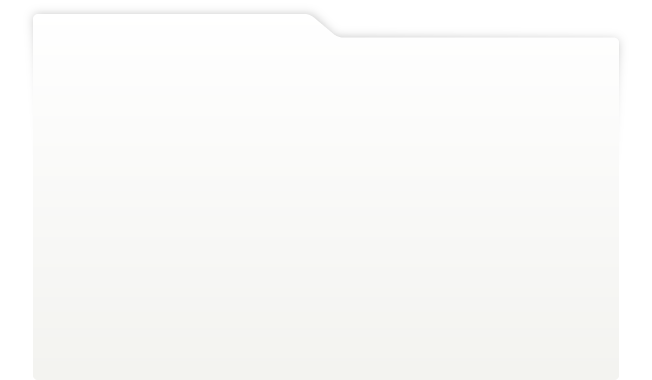
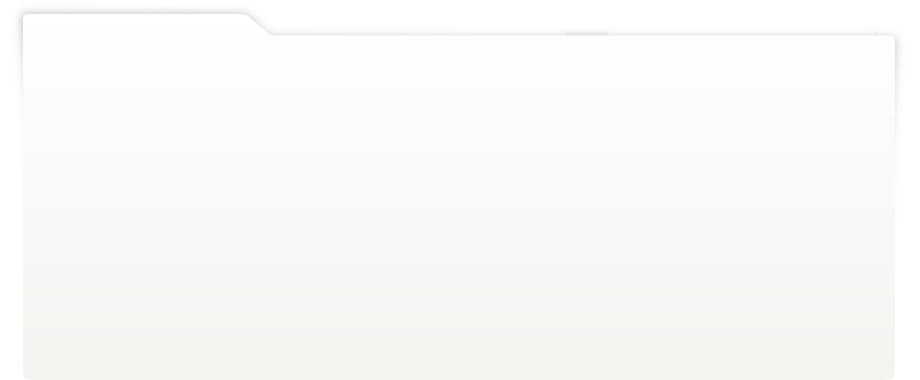
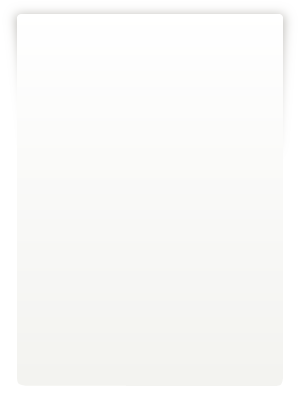
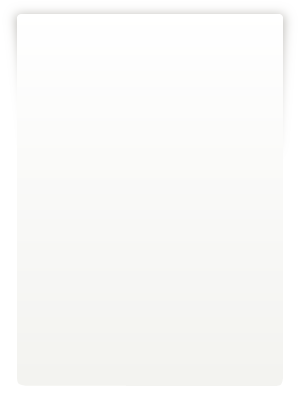
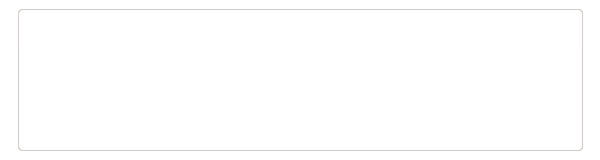
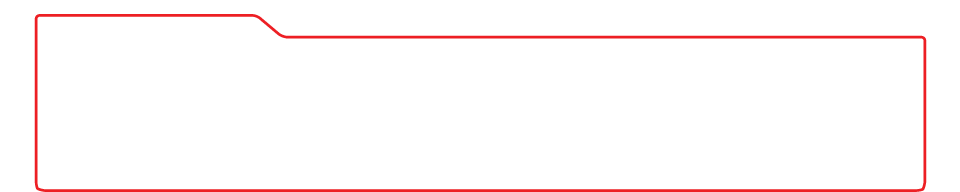
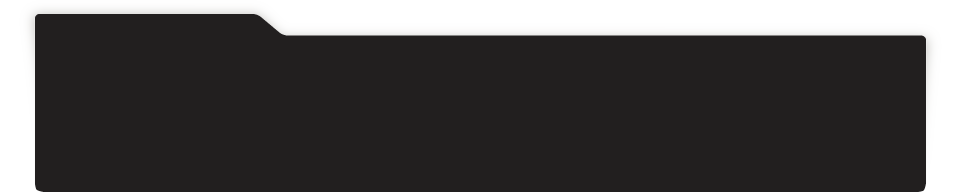
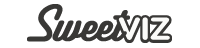
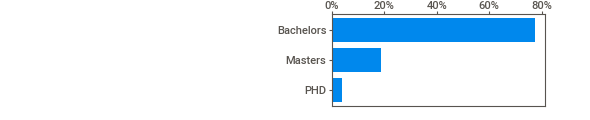
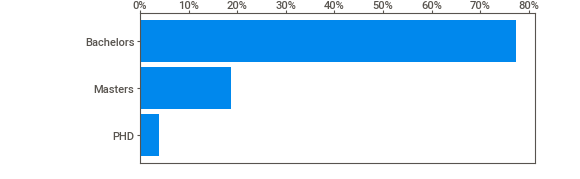
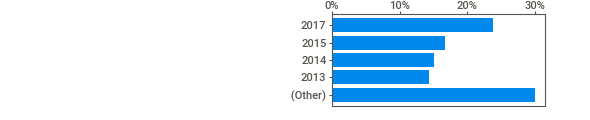
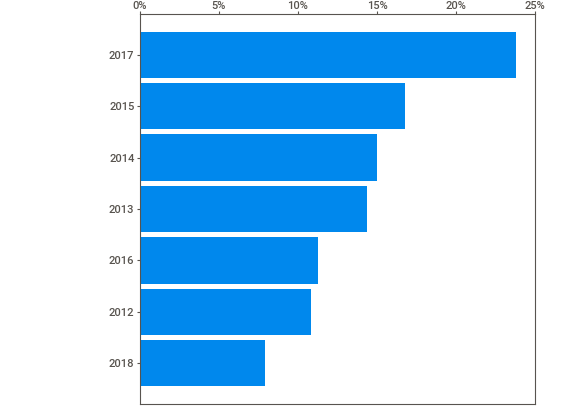
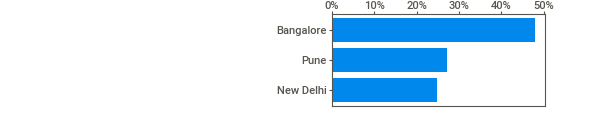
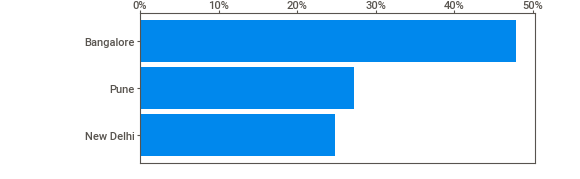
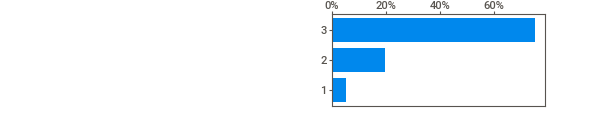
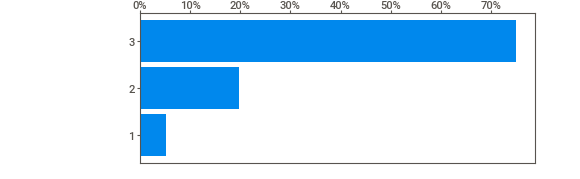
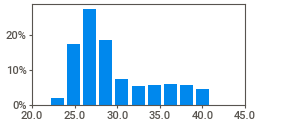
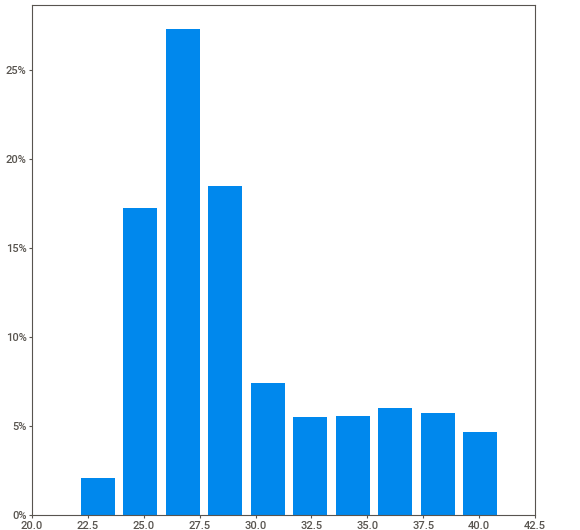
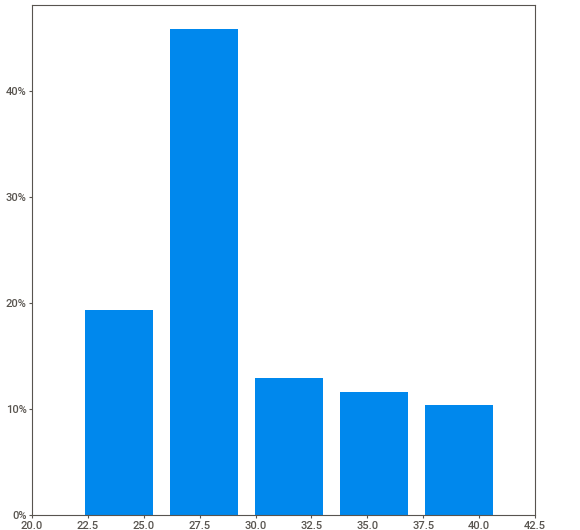
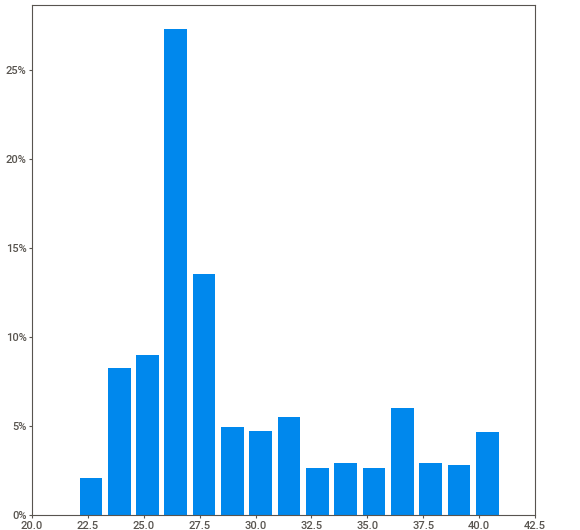
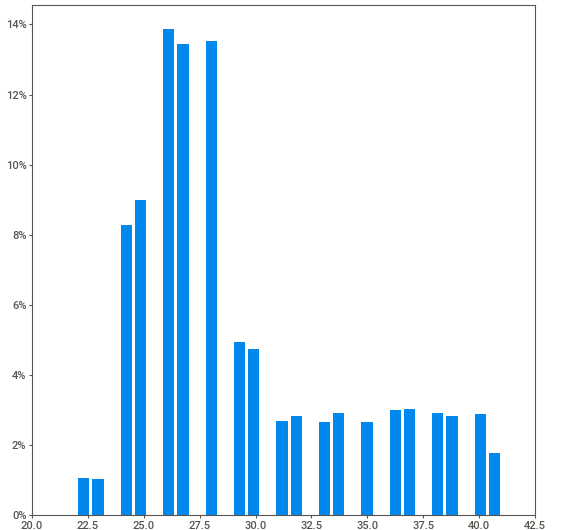
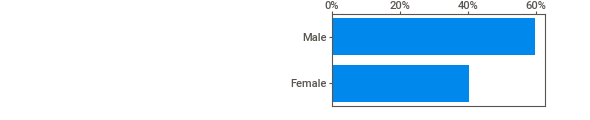
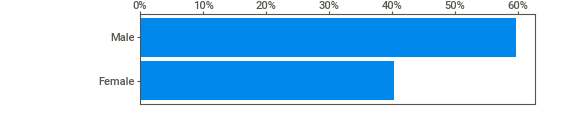
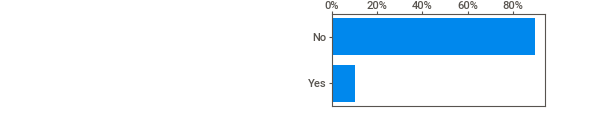
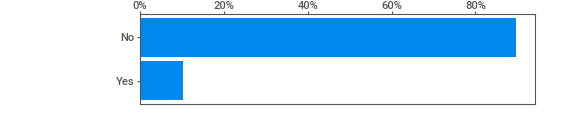
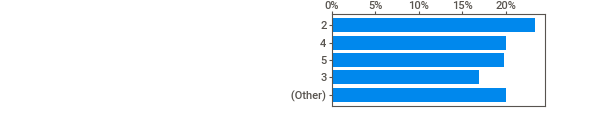
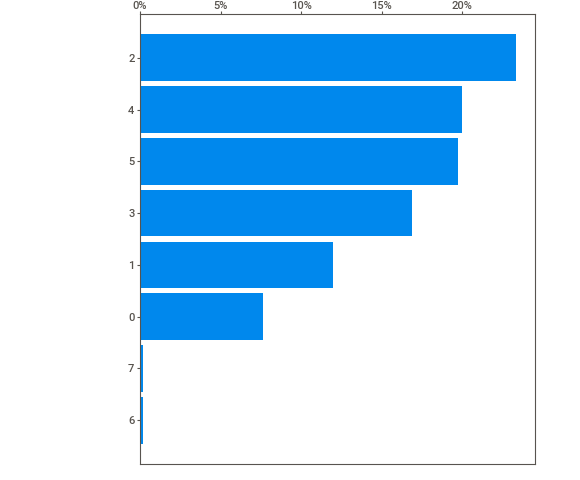
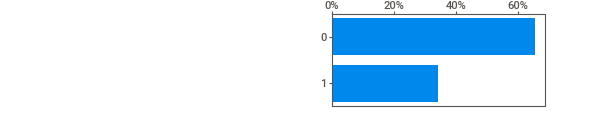
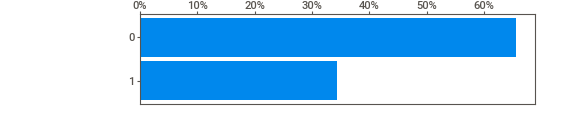
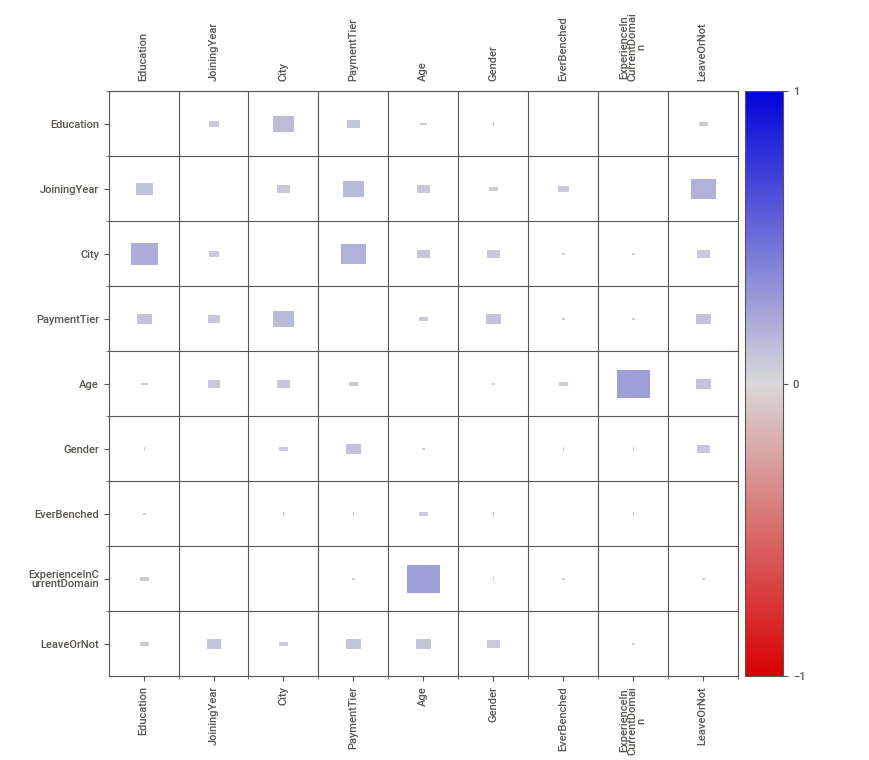
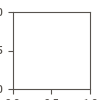

In [ ]:
# Visualizing data distributions with Sweetviz

report = sv.analyze(data) # Generate Sweetviz report

report.show_notebook() # Show the report

Menggunakan library Sweetviz dalam tahap eksplorasi awal dataset.

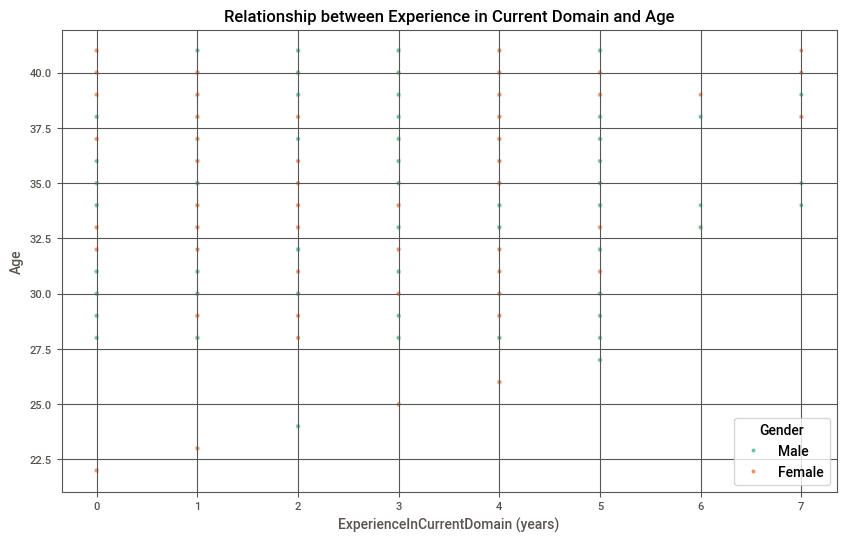

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ExperienceInCurrentDomain', y='Age', data=data, hue='Gender', palette='Set2')
plt.title('Relationship between Experience in Current Domain and Age')
plt.xlabel('ExperienceInCurrentDomain (years)')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Visualisasi hubungan antara dua variabel numerik. Dalam konteks ini, pengalaman dalam domain saat ini dan usia karyawan merupakan dua variabel yang mungkin saling berhubungan. Melihat pola atau trend kecenderungan bahwa karyawan yang lebih tua memiliki pengalaman lebih lama dalam domain tertentu, atau sebaliknya. Selain itu, penambahan dimensi gender sebagai hue memungkinkan kita untuk melihat apakah pola ini berbeda berdasarkan identitas gender.

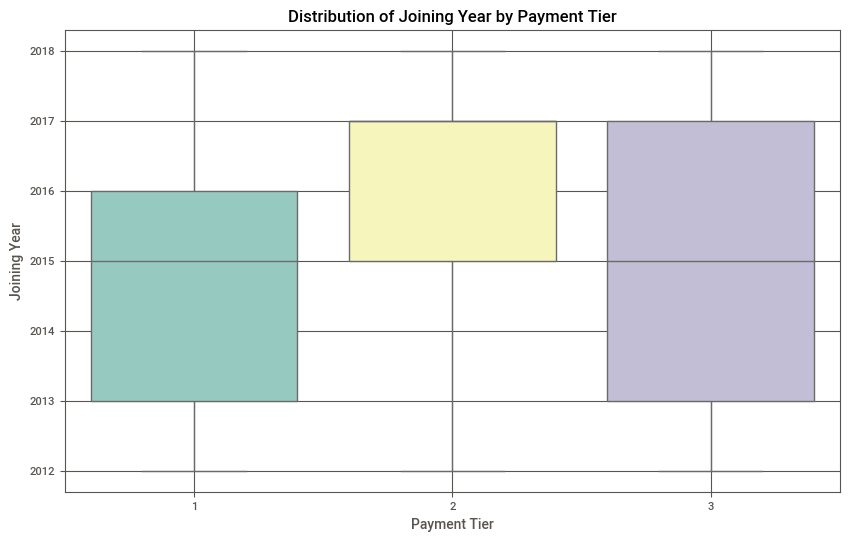

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='PaymentTier', y='JoiningYear', data=data, palette='Set3', hue='PaymentTier', legend=False)
plt.title('Distribution of Joining Year by Payment Tier')
plt.xlabel('Payment Tier')
plt.ylabel('Joining Year')
plt.grid(True)
plt.show()


Visualisasi pembanding distribusi variabel numerik (tahun bergabung) dalam beberapa kategori (tier pembayaran). Dengan box plot, kita bisa melihat perbedaan distribusi tahun bergabung antara berbagai tier pembayaran. Misalnya, apakah karyawan dengan tier pembayaran lebih tinggi cenderung bergabung dengan perusahaan pada tahun-tahun tertentu atau apakah distribusinya lebih merata.

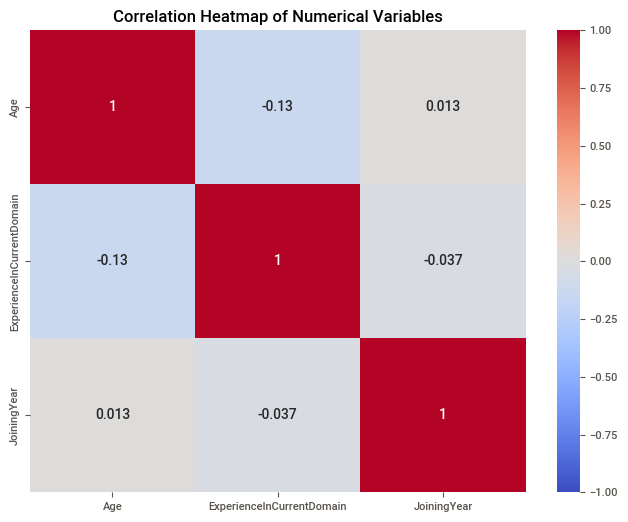

In [ ]:
# Selecting numerical columns for heatmap
numerical_cols = ['Age', 'ExperienceInCurrentDomain', 'JoiningYear']

# Calculating correlation matrix among numerical columns
corr_matrix = data[numerical_cols].corr()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


Visualisasi untuk mengeksplorasi seberapa erat hubungan antara variabel numerik dalam dataset. Melihat apakah ada korelasi yang signifikan antara variabel seperti usia, pengalaman dalam domain, dan tahun bergabung. Informasi ini penting untuk memahami bagaimana faktor-faktor ini berinteraksi dan mempengaruhi satu sama lain.

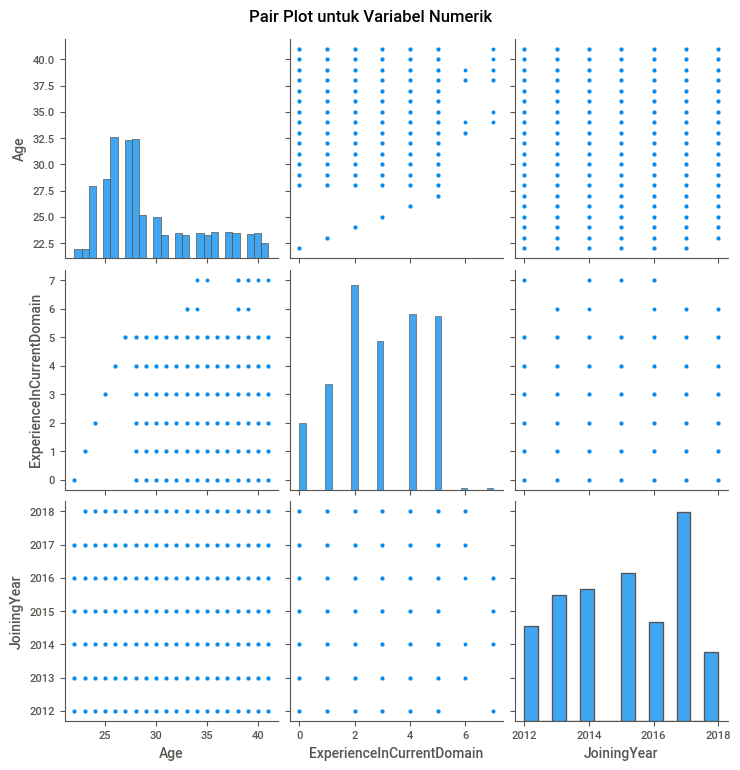

In [ ]:
sns.pairplot(data[numerical_cols])
plt.suptitle('Pair Plot untuk Variabel Numerik', y=1.02)
plt.show()

Visualisasi untuk mendapatkan gambaran yang komprehensif tentang hubungan antara semua pasangan variabel numerik dalam dataset. Dengan satu visualisasi, kita dapat melihat distribusi masing-masing variabel diagonal, sementara off-diagonal menunjukkan scatter plot dari pasangan variabel.Membantu dalam menemukan pola atau tren yang kompleks antara berbagai atribut numerik dalam dataset karyawan.

Membuat matriks korelasi untuk memahami hubungan antara atribut.

*`Korelasi ini menghasilkan nilai antara -1 dan 1, di mana 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi.`*

## Data Preprocessing

In [ ]:
# Handling categorical data
categorical_features = ['Education', 'City', 'Gender', 'EverBenched']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

Mengubah data kategorikal menjadi bentuk numerik menggunakan one-hot encoding.

In [ ]:
data = data.astype(int)

Konversi ke numerik

In [ ]:
# Normalizing/Standardizing numerical attributes
scaler = StandardScaler()
data[['Age', 'ExperienceInCurrentDomain']] = scaler.fit_transform(data[['Age', 'ExperienceInCurrentDomain']])

Menormalkan atau menstandarisasi atribut numerik untuk memastikannya berada dalam skala yang sama.

In [ ]:
# Defining features and target variable
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Total train data : {len(X_train)}")
print(f"Total test data : {len(X_test)}")


Total train data : 3722
Total test data : 931


Memisahkan fitur (X) dan label target (y) dengan LeaveOrNot sebagai target yang diprediksi.

Membagi data menjadi set pelatihan dan pengujian. test_size=0.2 berarti 20% data digunakan untuk pengujian, dan stratify=y memastikan distribusi label target tetap konsisten antara set pelatihan dan pengujian.

##**Modeling**

###Machine Learning

####Feature Importance

In [ ]:
# Train a Random Forest model to get feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


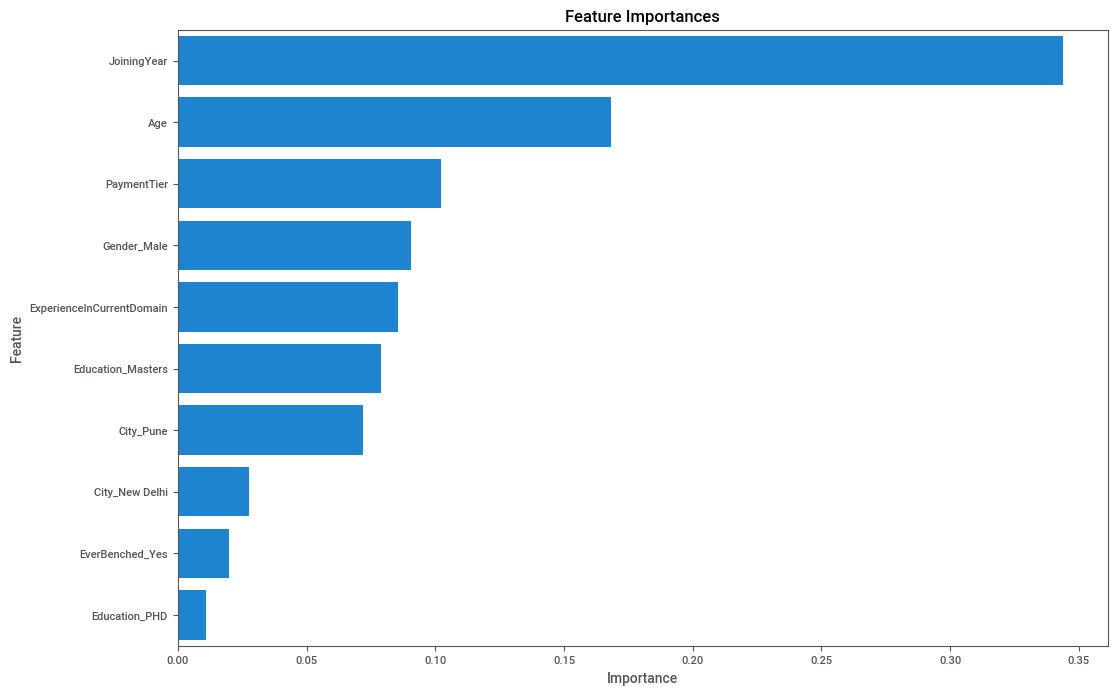


Feature Importances:
                     Feature  Importance
0                JoiningYear    0.344017
2                        Age    0.168285
1                PaymentTier    0.102188
8                Gender_Male    0.090612
3  ExperienceInCurrentDomain    0.085726
4          Education_Masters    0.078835
7                  City_Pune    0.072079
6             City_New Delhi    0.027708
9            EverBenched_Yes    0.019704
5              Education_PHD    0.010845


In [ ]:
# Display the feature importances visually
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title('Feature Importances')
plt.show()

print("\nFeature Importances:")
print(feature_importances)


In [ ]:
# Select the top 7 important features
top_features = feature_importances.head(7)['Feature']

In [ ]:
# Redefine X using only the top important features/feature selection
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

####*Random Forest Classifier*

In [ ]:
# Train and evaluate Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)
rf_pred = rf.predict(X_test_selected)

# Evaluate model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"Random Forest F1 Score: {rf_f1:.2f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.82
Random Forest Precision: 0.80
Random Forest Recall: 0.65
Random Forest F1 Score: 0.72

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       611
           1       0.80      0.65      0.72       320

    accuracy                           0.82       931
   macro avg       0.82      0.78      0.79       931
weighted avg       0.82      0.82      0.82       931



####*Decision Tree Classifier*

In [ ]:
# Train and evaluate Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train)
dt_pred = dt.predict(X_test_selected)

# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Decision Tree Precision: {dt_precision:.2f}")
print(f"Decision Tree Recall: {dt_recall:.2f}")
print(f"Decision Tree F1 Score: {dt_f1:.2f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.80
Decision Tree Precision: 0.77
Decision Tree Recall: 0.62
Decision Tree F1 Score: 0.69

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       611
           1       0.77      0.62      0.69       320

    accuracy                           0.80       931
   macro avg       0.79      0.76      0.77       931
weighted avg       0.80      0.80      0.80       931



####*XGBoost Classifier*

In [ ]:
#Train and evaluate XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_selected, y_train)
xgb_pred = xgb_model.predict(X_test_selected)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print(f"XGBoost Precision: {xgb_precision:.2f}")
print(f"XGBoost Recall: {xgb_recall:.2f}")
print(f"XGBoost F1 Score: {xgb_f1:.2f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))


XGBoost Accuracy: 0.83
XGBoost Precision: 0.83
XGBoost Recall: 0.65
XGBoost F1 Score: 0.73

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       611
           1       0.83      0.65      0.73       320

    accuracy                           0.83       931
   macro avg       0.83      0.79      0.80       931
weighted avg       0.83      0.83      0.83       931



Melatih model Decision Tree, Random Forest, dan XGBoost menggunakan data pelatihan dan membuat prediksi pada data pengujian.

Mendefinisikan fungsi untuk mencetak metrik evaluasi model, seperti akurasi, presisi, recall, dan skor F1, serta laporan klasifikasi. Kemudian, metrik ini dicetak untuk setiap model yang dilatih.

### Optimasi Model Machine Learning

####*Random Forest Model*

In [ ]:
# Set hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search to find the best combination
grid_search_rf.fit(X_train, y_train)

# Print the best tuning results
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", grid_search_rf.best_score_)

# Evaluate the best model
rf_best = grid_search_rf.best_estimator_
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_test)

# Evaluate the performance of the best model
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy for Random Forest: 0.8546507180486398

Random Forest Model Evaluation:
Accuracy: 0.8560687432867884
Precision: 0.8875
Recall: 0.665625
F1 Score: 0.7607142857142856

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       611
           1       0.89      0.67      0.76       320

    accuracy                           0.86       931
   macro avg       0.87      0.81      0.83       931
weighted avg       0.86      0.86      0.85       931



####*Decision Tree Model*

In [ ]:
# Set hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search to find the best combination
grid_search_dt.fit(X_train, y_train)

# Print the best tuning results
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Cross-Validation Accuracy for Decision Tree:", grid_search_dt.best_score_)

# Evaluate the best model
dt_best = grid_search_dt.best_estimator_
dt_best.fit(X_train, y_train)
dt_pred = dt_best.predict(X_test)

# Evaluate the performance of the best model
print("\nDecision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("F1 Score:", f1_score(y_test, dt_pred))
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Accuracy for Decision Tree: 0.8436364292415386

Decision Tree Model Evaluation:
Accuracy: 0.8259935553168636
Precision: 0.8558558558558559
Recall: 0.59375
F1 Score: 0.7011070110701106

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       611
           1       0.86      0.59      0.70       320

    accuracy                           0.83       931
   macro avg       0.84      0.77      0.79       931
weighted avg       0.83      0.83      0.82       931



####*XGBoost Model*

In [ ]:
# Set hyperparameter grid
param_grid_xgb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search to find the best combination
grid_search_xgb.fit(X_train, y_train)

# Print the best tuning results
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy for XGBoost:", grid_search_xgb.best_score_)

# Evaluate the best model
xgb_best = grid_search_xgb.best_estimator_
xgb_best.fit(X_train, y_train)
xgb_pred = xgb_best.predict(X_test)

# Evaluate the performance of the best model
print("\nXGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 1.0}
Best Cross-Validation Accuracy for XGBoost: 0.8562628996175219

XGBoost Model Evaluation:
Accuracy: 0.8517722878625135
Precision: 0.8729508196721312
Recall: 0.665625
F1 Score: 0.7553191489361701

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       611
           1       0.87      0.67      0.76       320

    accuracy                           0.85       931
   macro avg       0.86      0.81      0.82       931
weighted avg       0.85      0.85      0.85       931



###**Analysis Results Machine Learning**


* Dari segi akurasi dan metrik evaluasi lainnya seperti presisi, recall, dan F1 score, model Random Forest yang telah dioptimasi menunjukkan performa terbaik di antara ketiga model yang dievaluasi. Model ini mencapai akurasi sebesar 0.86, presisi 0.89, recall 0.67, dan F1 score 0.76 setelah proses optimasi. Hal ini menunjukkan bahwa model Random Forest tidak hanya unggul dalam akurasi, tetapi juga mampu menyeimbangkan antara presisi dan recall, terutama dalam memprediksi kelas minoritas (kelas 1).

* Model XGBoost juga menunjukkan performa yang sangat baik dengan akurasi 0.85, presisi 0.87, recall 0.67, dan F1 score 0.76 setelah optimasi. Meskipun sedikit di bawah performa model Random Forest, XGBoost tetap merupakan pilihan yang solid karena stabilitas dan kemampuannya dalam menangani data yang kompleks.

* Model Decision Tree, meskipun menunjukkan peningkatan setelah optimasi, tetap memiliki akurasi yang lebih rendah (0.83) dengan presisi 0.86, recall 0.59, dan F1 score 0.70. Hal ini mengindikasikan bahwa Decision Tree masih mengalami kesulitan dalam memprediksi kelas minoritas dengan tepat.

* Secara keseluruhan, model Random Forest yang dioptimasi adalah yang terbaik untuk masalah klasifikasi ini, diikuti oleh XGBoost. Kedua model ini mampu memberikan performa yang baik dan dapat diandalkan untuk prediksi apakah seorang karyawan akan meninggalkan perusahaan atau tidak. Optimasi model terbukti meningkatkan kinerja secara signifikan, terutama dalam hal presisi dan recall, yang penting dalam konteks pengambilan keputusan bisnis.

* faktor yang paling berpengaruh terhadap prediksi, dapat diihat hasil dari feature importances yang sudah dilakukan sebelumnya. Namun, faktor-faktor yang umumnya berpengaruh besar pada prediksi adalah fitur-fitur yang memiliki tingkat penting (importance) yang tinggi dari model. Misalnya, fitur-fitur seperti JoiningYear, Age, PaymentTier, dan fitur lainnya yang memiliki importance tinggi dapat menjadi faktor yang paling berpengaruh dalam prediksi apakah seorang karyawan akan pergi atau tidak (Leave or Not).

* Interpretasi model membantu kita memahami cara model membuat prediksi berdasarkan fitur-fitur yang ada, seperti bagaimana setiap fitur memengaruhi keputusan model. Misalnya, kita dapat mengetahui apakah kenaikan usia berhubungan dengan kemungkinan karyawan untuk pergi atau tingkat pendidikan memiliki pengaruh signifikan terhadap keputusan tersebut.


###Deep Learning

####ANN Classifier

In [ ]:
# Import lib pendukung ANN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [ ]:
#------ANN CLASSIFICATION------
# Encode TARGET variable for neural network, for completing this part (Redefine X using only the top important features)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Tujuan code diatas memang berbeda, namun code ini penting digunakan untuk langka Data Pre-Processing (persiapan data yang lengkap), mengubah target variabel bentuk integer menjadi bentuk yang bisa digunakan oleh model neural network untuk klasifikasi multikelas.

In [ ]:
# Define the model with Dropout layers for press overvitting
model = Sequential()
# Adjust input_dim to selected features
model.add(Dense(12, input_dim=X_train_selected.shape[1], activation='relu')) # layer pertama 12 bulatan/neuron
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(8, activation='relu')) # layer kedua 8 bulatan/neuron
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output neurons equal to number of classes/layer ketiga 2 bulatan/neuron(2 label LeaveOrNot)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Jadi dari clasifikasi ANN yang kita lakukan dapat dilihat dari behavior/perilakuk datanya dengan LeaveOrnot sebagai targetnya dan 7 feature penting sebagai data yang digunakan. mendefine arsitektur modelnya (keras), inisiasi code dense/layer1 12 neuron, layer2 8 neuron, 2 label kolom LeaveOrnot (memaksimalkan nilai vektornya antara 0 dan 1), dan menggunakan dropout untuk mengatasi overvitting.

In [ ]:
# Compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # lossnya mengggunakan categorical_crossentropy(multiclass, !! jika binary beda lagi!!)

In [ ]:
#1-10
model.fit(X_train_selected, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(X_test_selected, y_test)) # validasi menggunakan data tes

Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4747 - loss: 111.6723 - val_accuracy: 0.6563 - val_loss: 0.6429
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5495 - loss: 9.8719 - val_accuracy: 0.3437 - val_loss: 0.7561
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5883 - loss: 3.3601 - val_accuracy: 0.6563 - val_loss: 0.7254
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6137 - loss: 2.0599 - val_accuracy: 0.6563 - val_loss: 0.6457
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6274 - loss: 2.4558 - val_accuracy: 0.6563 - val_loss: 0.6464
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6379 - loss: 1.3118 - val_accuracy: 0.6563 - val_loss: 0.6455
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6201 - loss: 1.2973 - val_accuracy: 0.6563 - val_loss: 0.6811
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6107 - loss: 1.1492 - val_accuracy: 

In [ ]:
#11-10
model.fit(X_train_selected, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(X_test_selected, y_test)) # validasi menggunakan data tes

Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6429 - loss: 0.9163 - val_accuracy: 0.6563 - val_loss: 0.6675
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6366 - loss: 0.7237 - val_accuracy: 0.6563 - val_loss: 0.6507
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6169 - loss: 0.7368 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6431 - loss: 0.6866 - val_accuracy: 0.3437 - val_loss: 0.6975
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6324 - loss: 0.6645 - val_accuracy: 0.6563 - val_loss: 0.6796
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6199 - loss: 0.6800 - val_accuracy: 0.6563 - val_loss: 0.6486
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6534 - loss: 0.6526 - val_accuracy: 0.6563 - val_loss: 0.6458
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6521 - loss: 0.6562 - val_accuracy: 0.

In [ ]:
#21-30
model.fit(X_train_selected, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(X_test_selected, y_test)) # validasi menggunakan data tes

Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6439 - loss: 0.6551 - val_accuracy: 0.6563 - val_loss: 0.6464
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6541 - loss: 0.6501 - val_accuracy: 0.6563 - val_loss: 0.6444
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6634 - loss: 0.6402 - val_accuracy: 0.6563 - val_loss: 0.6437
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6436 - loss: 0.6526 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6610 - loss: 0.6413 - val_accuracy: 0.6563 - val_loss: 0.6436
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6511 - loss: 0.6468 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6618 - loss: 0.6403 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6550 - loss: 0.6445 - val_accuracy: 0.

In [ ]:
#31-40
model.fit(X_train_selected, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(X_test_selected, y_test)) # validasi menggunakan data tes

Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6551 - loss: 0.6444 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6487 - loss: 0.6484 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6595 - loss: 0.6415 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6594 - loss: 0.6415 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6638 - loss: 0.6387 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6455 - loss: 0.6504 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6582 - loss: 0.6424 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6632 - loss: 0.6391 - val_accuracy: 0.

In [ ]:
#41-50
model.fit(X_train_selected, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(X_test_selected, y_test)) # validasi menggunakan data tes

Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6631 - loss: 0.6392 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6505 - loss: 0.6473 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6607 - loss: 0.6407 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6482 - loss: 0.6488 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6467 - loss: 0.6497 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6544 - loss: 0.6447 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6684 - loss: 0.6355 - val_accuracy: 0.6563 - val_loss: 0.6435
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6433 - loss: 0.6518 - val_accuracy: 0.

In [ ]:
# Evaluate the model
_, accuracy = model.evaluate(X_test_selected, y_test)
print('Accuracy: %.2f' % (accuracy*100))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6512 - loss: 0.6469 
Accuracy: 65.63


Setelah menerapkan arsitektur (keras) dengan berbagai ketentuan (dense,input_dim, activation, dropout, dll) sesuai arah analisa ke 7 feature penting, didapatkan fit model (menggunakan data test) dengan tingkat loss yang over diawal namun kemudian menurun. Evaluasi pada data test, menghasilkan akurasi yang menunjukkan persentase 65% yang artinya model mampu memprediksi dengan benar 65% dari sampel data pengujian.

In [ ]:
# Predictions
y_pred = model.predict(X_test_selected)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Memprediksi hasil pada data uji (X_test_selected) dengan model memproses 30 batch (karena memiliki sekitar 300 sampel dalam set uji dan ukuran batch default 10, yang menghasilkan sekitar 30 batch).

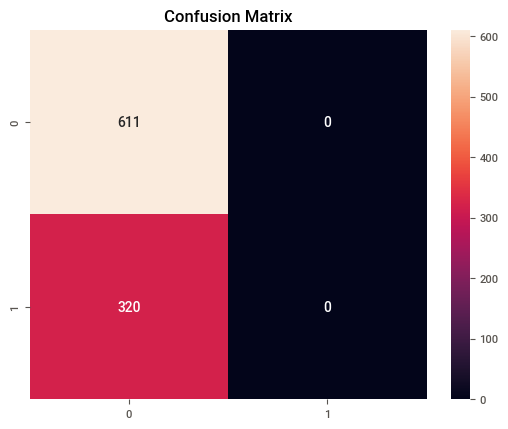

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

###Analysis Results Deep Learning

Melakukan modeling deep learning menggunakan model ANN secara umum menunjukan bahwa model mampu memberikan presentase memprediksi benar sebesar 65% dari 300 sample data uji dengan menggunakan 7 data penting dan LeaveOrNot sebagai target. Confusion matrix menjelaskan bahwa:
1. terdapat 320 karyawan secara actual menetap namun diprediksi pergi.
2. terdapat 611 karyawan secara aKtual pergi namun diprediksi pergi.
3. terdapat 0 karyawan secara aktual menetap namun diprediksi menetap.
4. terdapat 0 karyawan secara aktual pergi namun secara prediksi menetap.

Jadi dapat disimpulkan bahwa 7 data penting yang digunakan mampu mempengaruhi pengambilan keputusan karyawan dalam mengambil keputusan untuk menetap atau pergi, namun dapat dipastikan dengan 65% kebenaran bahwa 611 karyawan memilih pergi